<a href="https://colab.research.google.com/github/CHINMAYI-23/Airbnb-Bookings-Analysis-/blob/main/Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Airbnb Bookings Analysis

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as :

1. What can we learn about different hosts and areas?
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/content/Airbnb NYC 2019 (1).csv')

In [4]:
data.shape

(48895, 16)

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Observations:
There are total 48895 rows and 16 columns present in this dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Observations:
* Minimum price available is 0 and the maximum is 10000
* Mean price is 152

In [8]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Observations:
* There are 4 columns with null values
* 'name' column is having 16 null values and 'host_name' is having 21 null values
* 'last_review' and 'reviews_per_month' is having more null values.

# Handling Missing Values:

In [9]:
#missing values in percentage
Total = data.isnull().sum().sort_values(ascending = False)
missing_values = round(((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending = False),2)

#missing values in dataframe
values_total_percentage = pd.concat([Total, missing_values], axis = 1, keys = ['Total', 'percentage'],sort = False).sort_values('Total', ascending = False)
values_total_percentage 

,Total,percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


###The columns last_review and reviews_per_month are having more missing values. It's around 20% of the whole data

# Univariate Analysis


# Column_1 = name

In [10]:
data.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [11]:
data[data['name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0


In [12]:
data.room_type

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

# room_type column is not having any null values


# Column_2 = host_name

In [13]:
data['host_name'].nunique()

11452

# Column_3 = neighbourhood_group

In [14]:
data['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [15]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

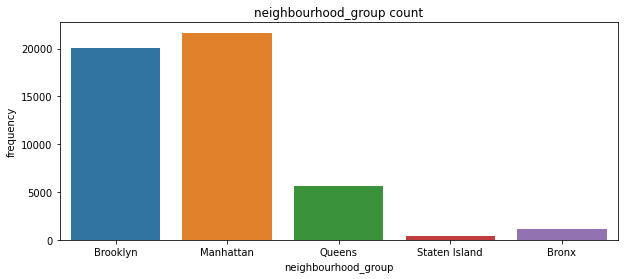

In [16]:
#count_plot
plt.figure(figsize = (10,4))
ax_3 = sns.countplot(x = 'neighbourhood_group', data = data)
ax_3.set_title('neighbourhood_group count')
ax_3.set_ylabel('frequency')
ax_3.set_xlabel('neighbourhood_group')
plt.show()

###  Brooklyn and Manhattan has the highest number of room bookings.


# Column_4 = neighbourhood

In [17]:
neighbourhood_unique_values = data['neighbourhood'].value_counts()
neighbourhood_unique_values

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

### There are 221 unique neighbours


# Column_5 = Latitude and Longitude

In [18]:
data[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


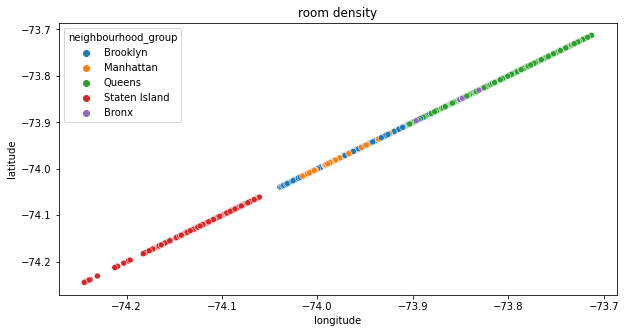

In [19]:
#To see the exact locations from the above columns
#scatterplot
plt.figure(figsize = (10,5))
ax_5 = sns.scatterplot(data.longitude,data.longitude,hue=data.neighbourhood_group)
ax_5.set_title('room density')
ax_5.set_ylabel('latitude')
ax_5.set_xlabel('longitude')
plt.show()

### Brooklyn and Manhattan are the most dense


# Column_6 = room_type

In [20]:
data[['room_type']].nunique()

room_type    3
dtype: int64

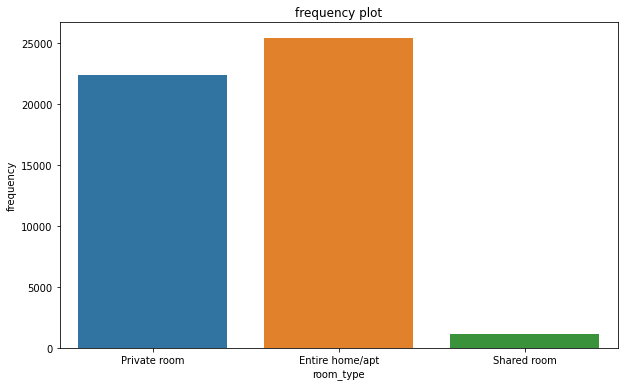

In [21]:
#Countplot
plt.figure(figsize = (10,6))
sns_6 = sns.countplot(x = 'room_type', data = data)
sns_6.set_title('frequency plot')
sns_6.set_xlabel('room_type')
sns_6.set_ylabel('frequency')

plt.show()

### People prefer to take entire home/apartment for rent followed by private room


# Column_7 = price

In [22]:
data[['price']].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [23]:
def category_price(price):
  if price<= 80 :
    return 'cheep'
  elif price>= 80 and price<=500:
    return 'affordable'
  else:
    return 'expensive'

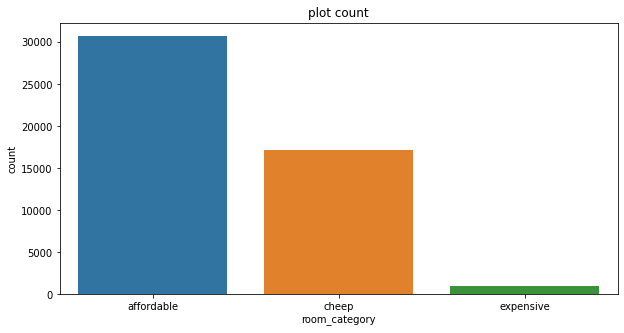

In [24]:
plt.figure(figsize = (10,5))
ax_6 = sns.countplot(x=data['price'].apply(category_price))
ax_6.set_title('plot count')
ax_6.set_xlabel('room_category')
ax_6.set_ylabel('count')
plt.show()

###Above picture says that people have more interest in having 'affordable' room or apartment rather than cheep and expensive rooms.


# Column_8 = minimum_nights

In [25]:
data[['minimum_nights']].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


In [26]:
data[['minimum_nights']].value_counts()

minimum_nights
1                 12720
2                 11696
3                  7999
30                 3760
4                  3303
                  ...  
182                   1
183                   1
184                   1
185                   1
1250                  1
Length: 109, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


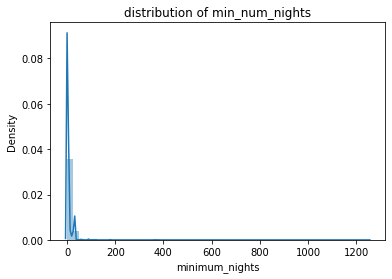

In [27]:
ax = sns.distplot(data.minimum_nights)
plt.title('distribution of min_num_nights')
plt.show()

###From the above graph we can say that minimum booking is done for one night and maximum is for more than a year.

# Column_9 = number_of_reviews

In [28]:
data[['number_of_reviews']].value_counts()

number_of_reviews
0                    10052
1                     5244
2                     3465
3                     2520
4                     1994
                     ...  
352                      1
351                      1
341                      1
340                      1
629                      1
Length: 394, dtype: int64

In [29]:
data[['number_of_reviews']].describe()

,number_of_reviews
count,48895.000000
mean,23.274466
std,44.550582
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'number_of_reviews')

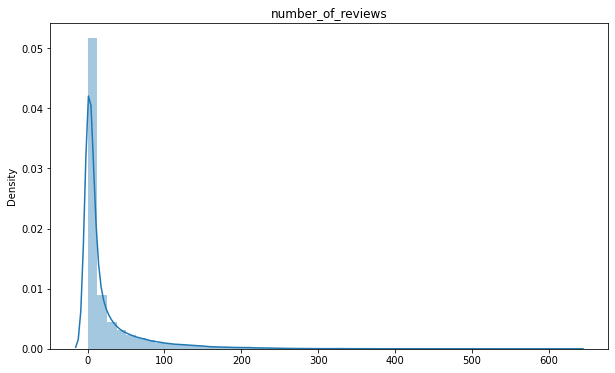

In [30]:
plt.figure(figsize = (10,6))
ax = sns.distplot(x = data['number_of_reviews'])
plt.title('number_of_reviews')

###We can say that most of the rooms are not rated properly and those which are frequently occupied are rated.


# Column_10 = last_review

In [31]:
data[['last_review']]

,last_review
0,2018-10-19
1,2019-05-21
2,NaN
3,2019-07-05
4,2018-11-19
...,...
48890,NaN
48891,NaN
48892,NaN
48893,NaN


# Column_11 = reviews_per_month

In [32]:
data[['reviews_per_month']].describe()

,reviews_per_month
count,38843.000000
mean,1.373221
std,1.680442
min,0.010000
25%,0.190000
50%,0.720000
75%,2.020000
max,58.500000


### Max rating given is 58 times, minimum is 0 and 75% of the data is for 2.02 time rating


# Column_12 = availability_365

In [33]:
data[['availability_365']].value_counts()

availability_365
0                   17533
365                  1295
364                   491
1                     408
89                    361
                    ...  
195                    26
196                    24
183                    24
181                    23
202                    20
Length: 366, dtype: int64

Text(0.5, 1.0, 'availability_of_scatterplot')

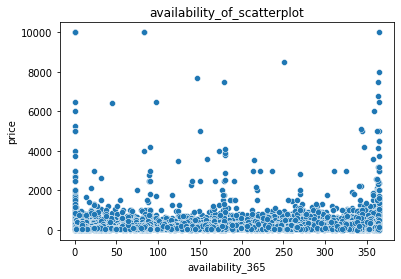

In [34]:
ax = sns.scatterplot(data=data, x = 'availability_365', y = 'price')
plt.title('availability_of_scatterplot')

### This scatterplot shows that the most of the rooms available price range starts from 0 to 2000

# Multivariate Analysis

In [35]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Relationship between price & neighbourhood_group

In [36]:
price_df=pd.DataFrame(data['price'].apply(category_price))

In [37]:
price_df.head()

,price
0,affordable
1,affordable
2,affordable
3,affordable
4,cheep


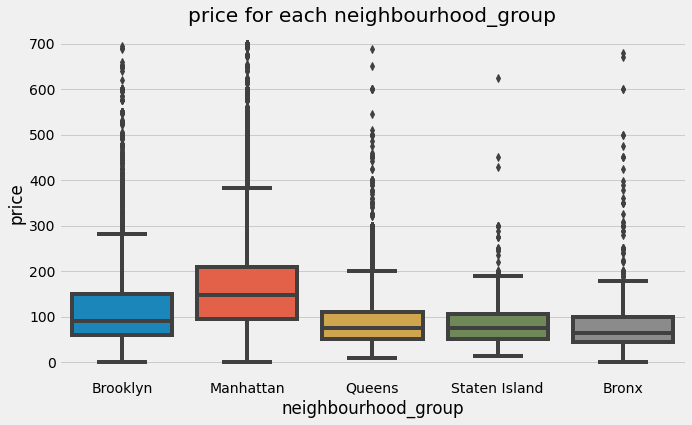

In [38]:
#matplotlib
#'fivethirtyeight' styling 
plt.style.use('fivethirtyeight')

price_500 = data[data.price <700]
plt.figure(figsize=(10,6))
plt.title("price for each neighbourhood_group")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_500)
plt.show()

# Observations:

* Manhattan is the most expensive followed by Brooklyn

# Relationship b/w median price & neighbourhood_group

In [40]:
neigh_group_price_group = data.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()

In [41]:
neigh_group_price_group

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


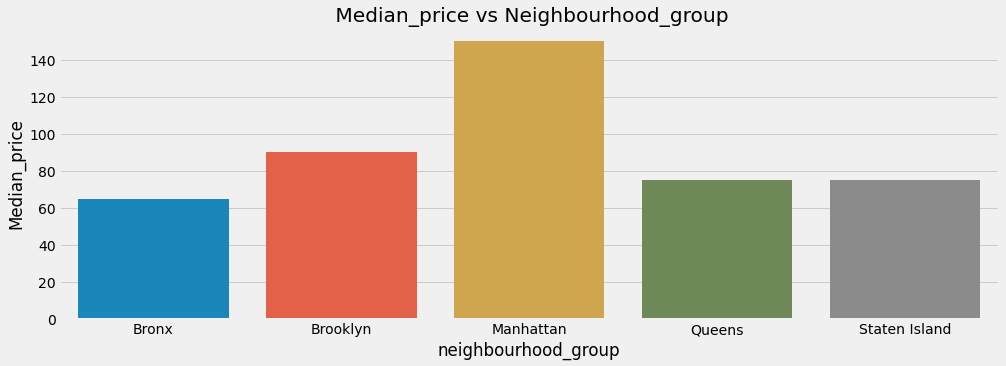

In [42]:
#barplot
plt.figure(figsize = (15,5))
ax_12 = sns.barplot(x = 'neighbourhood_group',y = 'price',data = neigh_group_price_group)
ax_12.set_title(' Median_price vs Neighbourhood_group')
ax_12.set_xlabel('neighbourhood_group')
ax_12.set_ylabel("Median_price")
plt.show()

### Manhatan area has the highest median price

# relationship between neighbourhood and price

In [43]:
data[['neighbourhood']].nunique()

neighbourhood    221
dtype: int64

In [44]:
neigh_price_group = data.groupby(['neighbourhood']).agg({'price':'median'}).reset_index()
neigh_price_group

,neighbourhood,price
0,Allerton,66.5
1,Arden Heights,72.5
2,Arrochar,65.0
3,Arverne,125.0
4,Astoria,85.0
...,...,...
216,Windsor Terrace,123.0
217,Woodhaven,52.0
218,Woodlawn,68.0
219,Woodrow,700.0


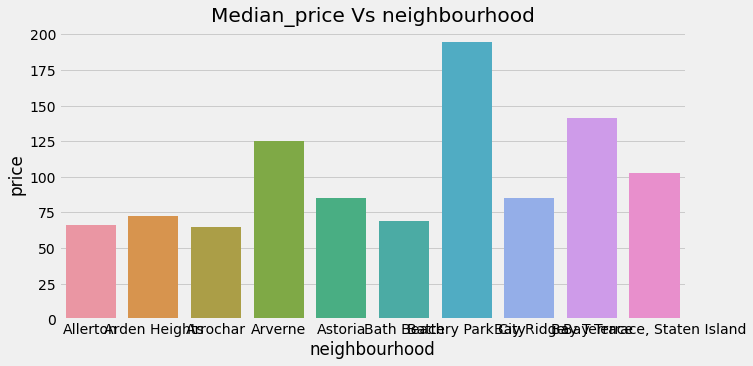

In [45]:
#barplot
plt.figure(figsize=(10,5))
sns.barplot(x = 'neighbourhood',y = 'price',data = neigh_price_group.head(10))
plt.title("Median_price Vs neighbourhood")
plt.show()

### Battery Park City is having high price in top 10 neighbourhoods

# Relationship b/w price & room_type

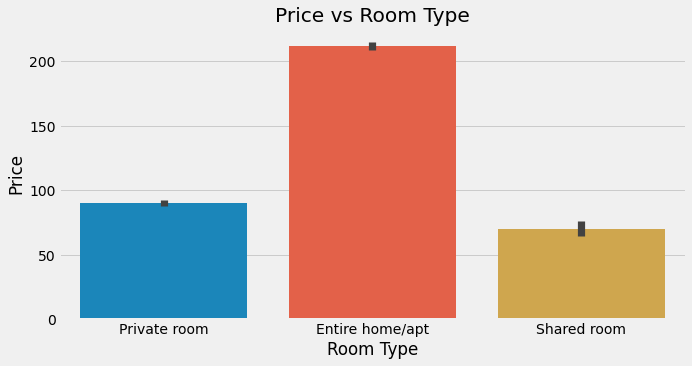

In [46]:
plt.figure(figsize = (10,5))
ax_8 = sns.barplot(y= 'price', x= 'room_type',data=data)
ax_8.set_title('Price vs Room Type')
ax_8.set_xlabel('Room Type')
ax_8.set_ylabel("Price")
plt.show()

* Shared room price is quite low as compared to other two types
* Large rooms are avaiable in entire home/apt category followed by private room

In [47]:
data['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

# Relationship b/w room_type and neighbourhood_grp

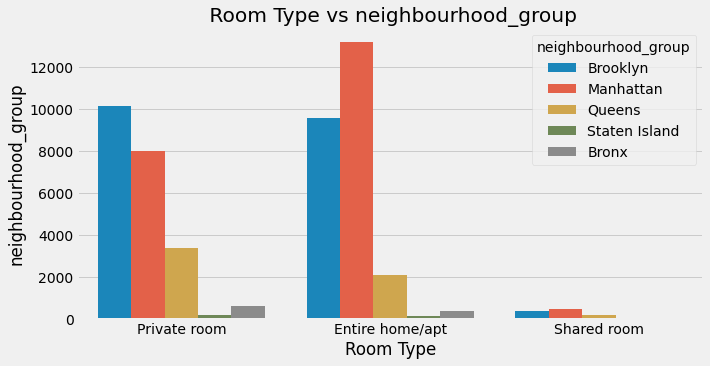

In [48]:
plt.figure(figsize = (10,5))
ax_11 = sns.countplot(x='room_type',hue='neighbourhood_group',data=data)
ax_11.set_title(' Room Type vs neighbourhood_group')
ax_11.set_xlabel('Room Type')
ax_11.set_ylabel("neighbourhood_group")
plt.show()

In [49]:
# Neighbourhoods generating Maximum and minimum revenues based on room_types

room_type_df = data.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
room_type_df.sort_values("price",ascending=False)



,,price
neighbourhood,room_type,
Williamsburg,Entire home/apt,389724
Midtown,Entire home/apt,331395
Upper West Side,Entire home/apt,329129
Hell's Kitchen,Entire home/apt,301786
Upper East Side,Entire home/apt,284150
...,...,...
South Beach,Shared room,20
Morris Heights,Shared room,20
Schuylerville,Shared room,20


# Conclusion:

1. People prefer to stay in entire home/ apt are going to stay a bit longer as compared to others
2. People in private rooms won't stay longer
3. Most people opt for price which is less in range or less price

